In [83]:
import numpy as np
import pandas as pd
 
# load the contents of a file into a pandas Dataframe
input_file = '/Users/aurelianosancho/Google Drive/Pre_Processing/train.csv'
df_titanic = pd.read_csv(input_file)

$\textbf{NOTE}$ Although it is not demonstrated in this section, you must ensure that any feature engineering or imputation that is carried out on the training data is also carried out on the test data.

In [2]:
df_titanic.shape

(891, 12)

In [3]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(df_titanic.index.name)

None


To make the PassengerId attribute the index of the df_titanic dataframe, use the following snippet:

In [9]:
df_titanic.set_index("PassengerId", inplace=True)

In [10]:
print(df_titanic.index.name)

PassengerId


In [11]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# extract the target attribute into its own dataframe
df_titanic_target = df_titanic.loc[:,['Survived']]
 
# create a dataframe that contains the 10 feature variables
df_titanic_features = df_titanic.drop(['Survived'], axis=1)

In [13]:
df_titanic_target['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
df_titanic_features['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe940299490>]],
      dtype=object)

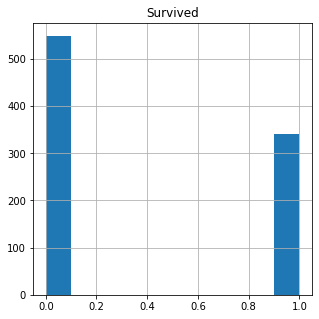

In [15]:
# histogram of target variable
%matplotlib inline
import matplotlib.pyplot as plt
df_titanic_target.hist(figsize=(5,5))

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe940955350>,
      dtype=object)

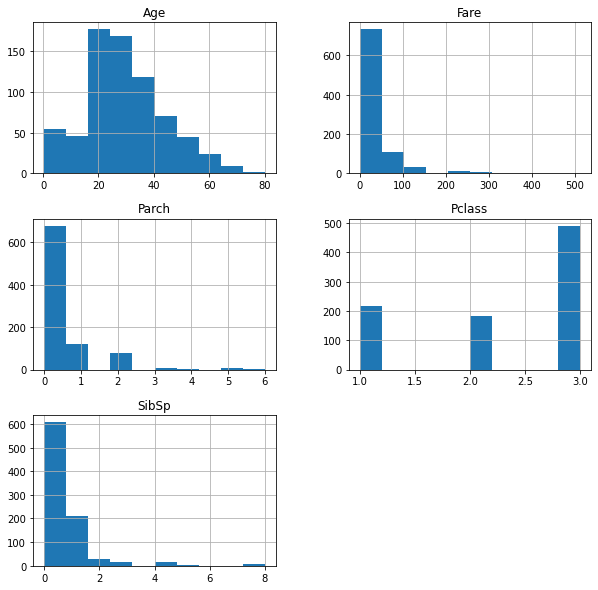

In [16]:
df_titanic_features.hist(figsize=(10,10))

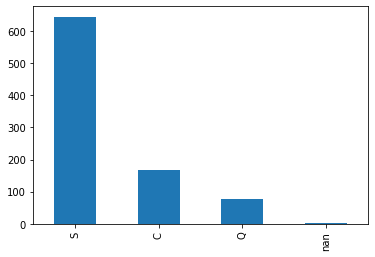

In [17]:
# histogram of categorical attribute 'Embarked'
# computed from the output of the value_counts() function
vc = df_titanic_features['Embarked'].value_counts(dropna=False)
vc.plot(kind='bar')

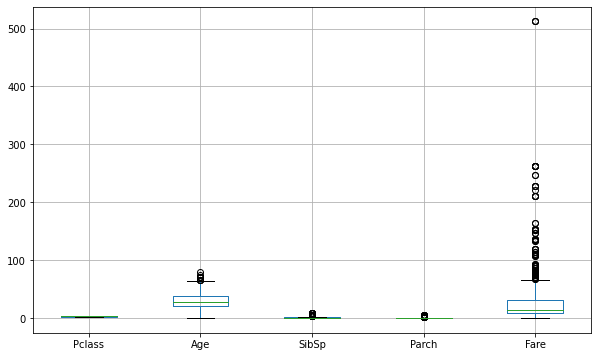

In [18]:
# create a box plot of numeric features.
df_titanic_features.boxplot(figsize=(10,6)) 

In [19]:
# what features show the strongest correlation with the target variable?
corr_matrix = df_titanic.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe94118b910>,
      dtype=object)

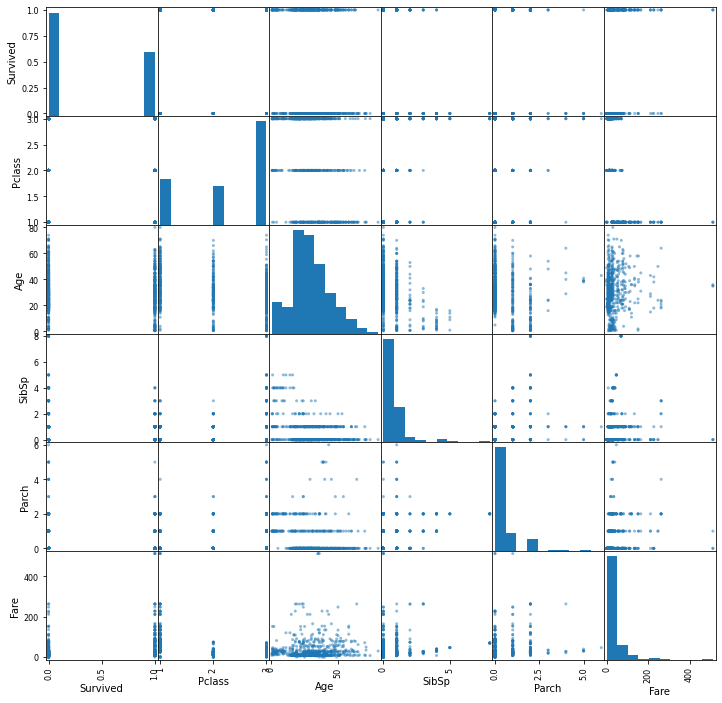

In [20]:
# visualize relationship between features using a
# matrix of scatter plots.
from pandas.plotting import scatter_matrix
scatter_matrix(df_titanic, figsize=(12,12)) 

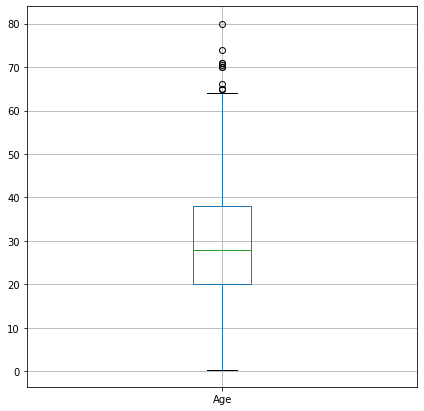

In [21]:
df_titanic_features.boxplot(column='Age', figsize=(7,7))

In [22]:
# fill missing values with the median
median_age = df_titanic_features['Age'].median()
print (median_age)
28.0
 
df_titanic_features["Age"].fillna(median_age, inplace=True) 

28.0


In [23]:
# fill missing values of the Embarked attribute
# with the most common value in the column

embarked_value_counts = df_titanic_features['Embarked'].value_counts(dropna=True)
most_common_value = embarked_value_counts.index[0]
 
print (most_common_value)
 
df_titanic_features["Embarked"].fillna(most_common_value, inplace=True) 

S


In [24]:
# create a boolean feature 'CabinIsKnown'
# which will have True if the Cabin column
# does not have missing data
df_titanic_features['CabinIsKnown'] = ~df_titanic_features.Cabin.isnull()
 
# drop the Cabin column from the dataframe
df_titanic_features.drop(['Cabin'], axis=1, inplace=True)

In [25]:
# display the columns of the dataframe.
print (df_titanic_features.columns.values)
 
# display number of missing values in the columns
df_titanic_features.isnull().sum()

['Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'Embarked'
 'CabinIsKnown']


Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
CabinIsKnown    0
dtype: int64

In [26]:
# create a numeric feature called FamilySize that is
# the sum of the SibSp and Parch features.
df_titanic_features['FamilySize'] = df_titanic_features.SibSp + df_titanic_features.Parch

In [27]:
# generate new categorical feature AgeCategory
bins_age = [0,20,30,40,50,150]
labels_age = ['<20','20-30','30-40','40-50','>50']
 
df_titanic_features['AgeCategory'] = pd.cut(df_titanic_features.Age,
                                            bins=bins_age,
                                            labels=labels_age,
                                            include_lowest=True)

In [28]:
df_titanic_features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinIsKnown,FamilySize,AgeCategory
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,1,20-30
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,1,30-40
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,0,20-30
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True,1,30-40
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,0,30-40


In [29]:
# generate new categorical feature FareCategory
df_titanic_features['FareCategory'] = pd.qcut(df_titanic_features.Fare,
                                            q=4,
                                            labels=['Q1', 'Q2', 'Q3', 'Q4']) 

In [30]:
# use one-hot encoding to convert categorical attributes
# into binary numeric attributes
df_titanic_features = pd.get_dummies(df_titanic_features, columns=['Sex','Embarked','CabinIsKnown','AgeCategory','FareCategory'])
 
# display the columns of the dataframe.
print (df_titanic_features.columns.values)

['Pclass' 'Name' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare' 'FamilySize'
 'Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S'
 'CabinIsKnown_False' 'CabinIsKnown_True' 'AgeCategory_<20'
 'AgeCategory_20-30' 'AgeCategory_30-40' 'AgeCategory_40-50'
 'AgeCategory_>50' 'FareCategory_Q1' 'FareCategory_Q2' 'FareCategory_Q3'
 'FareCategory_Q4']


In [31]:
df_titanic_features.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,Sex_female,Sex_male,...,CabinIsKnown_True,AgeCategory_<20,AgeCategory_20-30,AgeCategory_30-40,AgeCategory_40-50,AgeCategory_>50,FareCategory_Q1,FareCategory_Q2,FareCategory_Q3,FareCategory_Q4
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,1,0,...,1,0,0,1,0,0,0,0,0,1
5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [32]:
# strong negative correlation between Sex_male and Sex_female.
# one of these can be dropped.
corr_matrix = df_titanic_features[['Sex_male', 'Sex_female']].corr()
print(corr_matrix)

            Sex_male  Sex_female
Sex_male         1.0        -1.0
Sex_female      -1.0         1.0


In [33]:
# drop the Name, Ticket, Sex_female, CabinIsKnown_False features
# to get a dataframe that can be used for linear or logistic regression
df_titanic_features_numeric = df_titanic_features.drop(['Name', 'Ticket', 'Sex_female', 'CabinIsKnown_False'], axis=1)

In [34]:
df_titanic_features_numeric.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_C,Embarked_Q,Embarked_S,CabinIsKnown_True,AgeCategory_<20,AgeCategory_20-30,AgeCategory_30-40,AgeCategory_40-50,AgeCategory_>50,FareCategory_Q1,FareCategory_Q2,FareCategory_Q3,FareCategory_Q4
PassengerId,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0
2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,3,26.0,0,0,7.9250,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


In [35]:
df_titanic_features_numeric.shape

(891, 20)

In [ ]:
####################### pre-processing Test #######################

In [36]:
input_file = '/Users/aurelianosancho/Google Drive/Pre_Processing/train.csv'
df_titanic_test = pd.read_csv(input_file)
df_titanic_test.set_index("PassengerId", inplace=True)

df_titanic_test_target = df_titanic_test.loc[:,['Survived']]
df_titanic_test_features = df_titanic_test.drop(['Survived'], axis=1)

median_age = df_titanic_test_features['Age'].median()
df_titanic_test_features["Age"].fillna(median_age, inplace=True)

embarked_value_counts = df_titanic_test_features['Embarked'].value_counts(dropna=True)
most_common_value = embarked_value_counts.index[0]
df_titanic_test_features["Embarked"].fillna(most_common_value, inplace=True) 

df_titanic_test_features['CabinIsKnown'] = ~df_titanic_test_features.Cabin.isnull()
df_titanic_test_features.drop(['Cabin'], axis=1, inplace=True)

df_titanic_test_features['FamilySize'] = df_titanic_test_features.SibSp + df_titanic_test_features.Parch

bins_age = [0,20,30,40,50,150]
labels_age = ['<20','20-30','30-40','40-50','>50']
 
df_titanic_test_features['AgeCategory'] = pd.cut(df_titanic_test_features.Age,
                                            bins=bins_age,
                                            labels=labels_age,
                                            include_lowest=True)

df_titanic_test_features['FareCategory'] = pd.qcut(df_titanic_test_features.Fare,
                                            q=4,
                                            labels=['Q1', 'Q2', 'Q3', 'Q4']) 


df_titanic_test_features = pd.get_dummies(df_titanic_test_features, columns=['Sex','Embarked','CabinIsKnown','AgeCategory','FareCategory'])
 
df_titanic_test_features_numeric = df_titanic_test_features.drop(['Name', 'Ticket', 'Sex_female', 'CabinIsKnown_False'], axis=1)

* titanic_features_train = df_titanic_features_numeric

* titanic_features_test = df_titanic_test_features_numeric

* titanic_target_train = df_titanic_test_target

* titanic_target_test = df_titanic_target

In [37]:
df_titanic_test_features_numeric.shape

(891, 20)

In [38]:
titanic_features_train = df_titanic_features_numeric
titanic_features_test = df_titanic_test_features_numeric
titanic_target_train = df_titanic_target
titanic_target_test = df_titanic_test_target 

In [65]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=1, gamma='auto', probability=True)
svc_model.fit(titanic_features_train, titanic_target_train.values.ravel())
 
# train a logistic regression model on the diabetes dataset
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(penalty='l2', fit_intercept=True, solver='liblinear')
logit_model.fit(titanic_features_train, titanic_target_train.values.ravel())
 
# train a decision tree based binary classifier.
from sklearn.tree import DecisionTreeClassifier
 
dtree_model = DecisionTreeClassifier(max_depth=4)
dtree_model.fit(titanic_features_train, titanic_target_train.values.ravel())
 
# use the models to create predictions on the diabetes test set
svc_predictions = svc_model.predict(titanic_features_test)
logit_predictions = logit_model.predict(titanic_features_test)
dtree_predictions = dtree_model.predict(titanic_features_test)
 
# simplistic metric - the percentage of correct predictions
svc_correct = svc_predictions == titanic_target_test.values.ravel()
svc_correct_percent = np.count_nonzero(svc_correct) / svc_predictions.size * 100

logit_correct = logit_predictions == titanic_target_test.values.ravel()
logit_correct_percent = np.count_nonzero(logit_correct) / logit_predictions.size * 100
 
dtree_correct = dtree_predictions == titanic_target_test.values.ravel()
dtree_correct_percent = np.count_nonzero(dtree_correct) / dtree_predictions.size * 100

In [66]:
print ('SVC', svc_correct_percent, 'Logistic Regression', logit_correct_percent, 'DecisionTree', dtree_correct_percent)


SVC 84.73625140291807 Logistic Regression 81.03254769921436 DecisionTree 83.61391694725027


In [67]:
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(titanic_target_test.values.ravel(), svc_predictions)
cm_logit = confusion_matrix(titanic_target_test.values.ravel(), logit_predictions)
cm_dtree = confusion_matrix(titanic_target_test.values.ravel(), dtree_predictions)

In [153]:
cm_svc

array([[513,  36],
       [100, 242]])

In [154]:
cm_logit

array([[472,  77],
       [ 92, 250]])

In [155]:
cm_dtree

array([[499,  50],
       [ 96, 246]])

In [68]:
tn_svc, fp_svc, fn_svc, tp_svc = cm_svc.ravel()
tn_logit, fp_logit, fn_logit, tp_logit = cm_logit.ravel()
tn_dtree, fp_dtree, fn_dtree, tp_dtree = cm_dtree.ravel()

In [69]:
print (tn_svc, fp_svc, fn_svc, tp_svc)

print (tn_logit, fp_logit, fn_logit, tp_logit)

print (tn_dtree, fp_dtree, fn_dtree, tp_dtree)

513 36 100 242
472 77 92 250
499 50 96 246


In [70]:
accuracy_svc = (tp_svc + tn_svc) / (tn_svc + fp_svc + fn_svc + tp_svc)
accuracy_logit = (tp_logit + tn_logit) / (tn_logit + fp_logit + fn_logit + tp_logit)
accuracy_dtree = (tp_dtree + tn_dtree) / (tn_dtree + fp_dtree + fn_dtree + tp_dtree)
 
precision_svc = tp_svc / (tp_svc + fp_svc)
precision_logit = tp_logit / (tp_logit + fp_logit)
precision_dtree = tp_dtree / (tp_dtree + fp_dtree)
 
recall_svc = tp_svc / (tp_svc + fn_svc)
recall_logit = tp_logit / (tp_svc + fn_logit)
recall_dtree = tp_dtree / (tp_dtree + fn_dtree)

In [157]:
print('Accuracy SVC:',accuracy_svc, 'Accuracy REG:', accuracy_logit, 'Accuracy DTREE:', accuracy_dtree)
 
print('Precision SVC:',precision_svc, 'Precision REG:',precision_logit, 'Precision DTREE:',precision_dtree)
 
print('Recall SVC:', recall_svc, 'Recall REG:',recall_logit, 'Recall DTREE:',recall_dtree)

Accuracy SVC: 0.8473625140291807 Accuracy REG: 0.8103254769921436 Accuracy DTREE: 0.8361391694725028
Precision SVC: 0.8705035971223022 Precision REG: 0.764525993883792 Precision DTREE: 0.831081081081081
Recall SVC: 0.7076023391812866 Recall REG: 0.7485029940119761 Recall DTREE: 0.7192982456140351


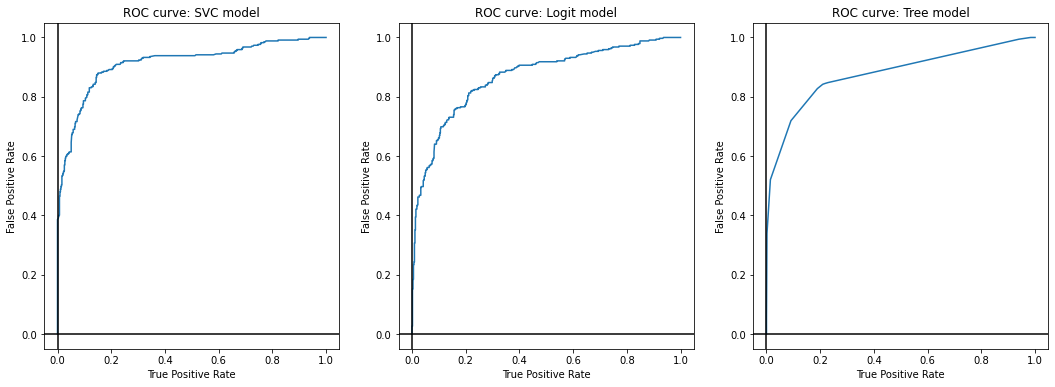

In [72]:
# plot ROC curves for the three classifiers.
 
# compute prediction probabilities
svc_probabilities = svc_model.predict_proba(titanic_features_test)
logit_probabilities = logit_model.predict_proba(titanic_features_test)
dtree_probabilities = dtree_model.predict_proba(titanic_features_test)
 
# calculate the FPR and TPR for all thresholds of the SVC model
import sklearn.metrics as metrics
svc_fpr, svc_tpr, svc_thresholds = metrics.roc_curve(titanic_target_test.values.ravel(),
                                                     svc_probabilities[:,1],
                                                     pos_label=1,
                                                     drop_intermediate=False)


logit_fpr, logit_tpr, logit_thresholds = metrics.roc_curve(titanic_target_test.values.ravel(),
                                                           logit_probabilities[:,1],pos_label=1,
                                                           drop_intermediate=False)
 
# calculate the FPR and TPR for all thresholds of the decision tree model
dtree_fpr, dtree_tpr, dtree_thresholds = metrics.roc_curve(titanic_target_test.values.ravel(),
                                                           dtree_probabilities[:,1],pos_label=1,
                                                           drop_intermediate=False)
 
 
 
fig, axes = plt.subplots(1, 3, figsize=(18,6))
 
axes[0].set_title('ROC curve: SVC model')
axes[0].set_xlabel("True Positive Rate")
axes[0].set_ylabel("False Positive Rate")
axes[0].plot(svc_fpr, svc_tpr)
axes[0].axhline(y=0, color='k')
axes[0].axvline(x=0, color='k')
 
axes[1].set_title('ROC curve: Logit model')

axes[1].set_xlabel("True Positive Rate")
axes[1].set_ylabel("False Positive Rate")
axes[1].plot(logit_fpr, logit_tpr)
axes[1].axhline(y=0, color='k')
axes[1].axvline(x=0, color='k')
 
axes[2].set_title('ROC curve: Tree model')
axes[2].set_xlabel("True Positive Rate")
axes[2].set_ylabel("False Positive Rate")
axes[2].plot(dtree_fpr, dtree_tpr)
axes[2].axhline(y=0, color='k')
axes[2].axvline(x=0, color='k')

In [74]:
svc_auc = metrics.auc(svc_fpr, svc_tpr)
logit_auc = metrics.auc(logit_fpr, logit_tpr)
dtree_auc = metrics.auc(dtree_fpr, dtree_tpr)

In [75]:
print (svc_auc, logit_auc, dtree_auc)

0.9137373640537287 0.8673744926980475 0.8772728725274022


The following code snippet uses the GridSearchCV class to try different hyperparameter 
combinations for a multi-class decision tree classifier on the Iris flowers dataset and returns the hyperparameters that result in the best precision score:

In [158]:
# use grid search to find the hyperparameters that result
# in the best accuracy score for a decision tree
# based classifier on the Iris Flowers dataset
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
 
grid_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'max_features': ['auto', 'sqrt', 'log2'],
    'presort': [True, False]
}
 
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=grid_params, scoring='accuracy',
                           cv=5, n_jobs=-1)
 
grid_search.fit(titanic_features_train.values, titanic_target_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [159]:
best_parameters = grid_search.best_params_
print(best_parameters)
 
best_accuracy = grid_search.best_score_
print(best_accuracy)

{'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 12, 'presort': False, 'splitter': 'best'}
0.8204381394764922
